## Configuration

In [1]:
# Data management
import pandas as pd


# Graphics
import matplotlib.pyplot as plt
from matplotlib.pyplot import text
import seaborn as sns
sns.set(font_scale=0.9)
sns.set_style("whitegrid")
sns.set_style({'font.family':'monospace'})

## Mesh times

In [2]:
times = pd.read_csv('mesh_times.txt', sep=";", header=None)
times.columns = ["number_nodes","mesh_time"]

In [4]:
def is_outlier(s):
    Q1 =s.quantile(0.25)
    Q3 = s.quantile(0.75)
    IQR = Q3 - Q1
    
    lower_limit = Q1 - 1.5*IQR
    upper_limit = Q3 + 1.5*IQR
    return ~s.between(lower_limit, upper_limit)

times = times[~times.groupby('number_nodes')['mesh_time'].apply(is_outlier)]

times.describe()

,number_nodes,mesh_time
count,2028.000000,2028.000000
mean,12.705128,117.276849
std,6.553550,117.889119
min,2.000000,2.167369
25%,7.000000,20.066087
50%,13.000000,74.065910
75%,18.000000,186.337141
max,24.000000,420.833654


<AxesSubplot:xlabel='number_nodes', ylabel='mesh_time'>

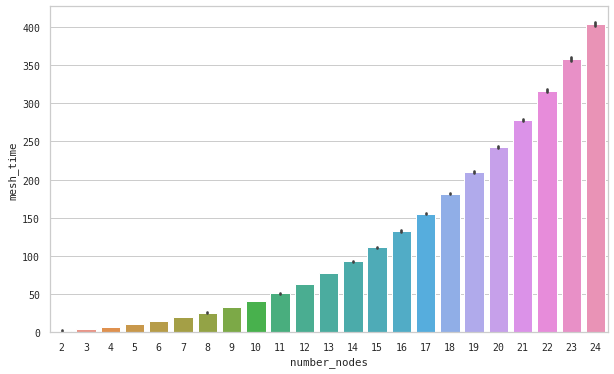

In [5]:
# barplot
fig, axs = plt.subplots(1, 1, figsize=(10,6))
sns.barplot(x='number_nodes',
            y='mesh_time',
            data=times,
            ax=axs)

<AxesSubplot:xlabel='number_nodes', ylabel='mesh_time'>

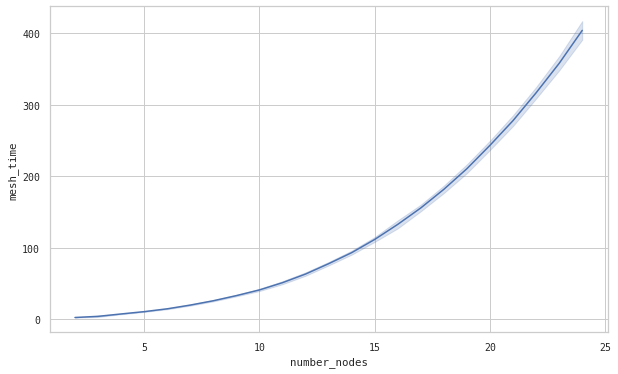

In [6]:
# mean lineplot with std
fig, axs = plt.subplots(1, 1, figsize=(10,6))
sns.lineplot(x='number_nodes',
             y='mesh_time',
             data=times,
             err_style="band",
             ci='sd',
             ax=axs)

<AxesSubplot:xlabel='number_nodes', ylabel='mesh_time'>

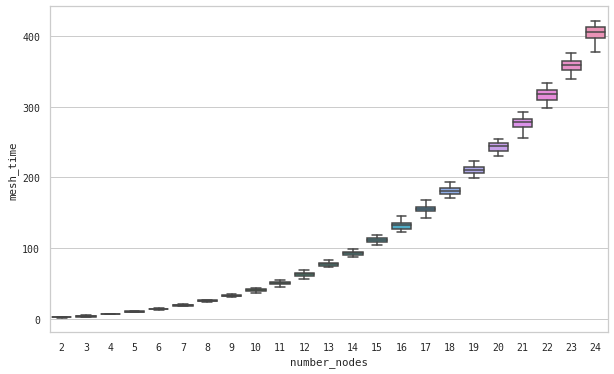

In [7]:
# boxplot
fig, axs = plt.subplots(1, 1, figsize=(10,6))
sns.boxplot(x='number_nodes',
            y='mesh_time',
            data=times,
            showfliers=False)

<AxesSubplot:xlabel='number_nodes', ylabel='mesh_time'>

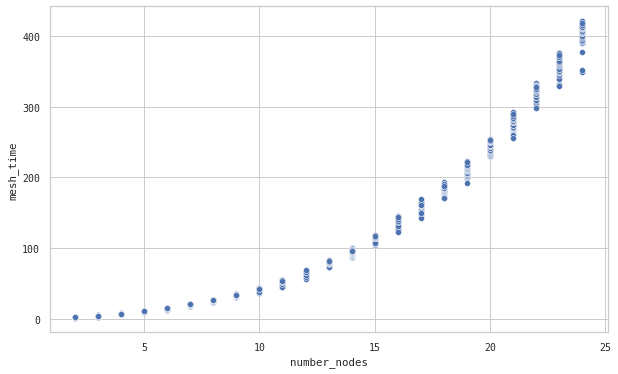

In [8]:
# points of each experiment
fig, axs = plt.subplots(1, 1, figsize=(10,6))
sns.scatterplot(x='number_nodes',
            y='mesh_time',
            data=times)

<AxesSubplot:xlabel='number_nodes', ylabel='mesh_time'>

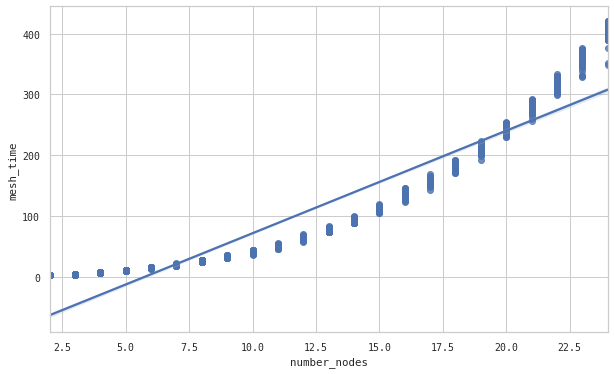

In [9]:
# linear regression
fig, axs = plt.subplots(1, 1, figsize=(10,6))
sns.regplot(x='number_nodes',
            y='mesh_time',
            data=times,
            ax=axs)

<AxesSubplot:xlabel='number_nodes', ylabel='mesh_time'>

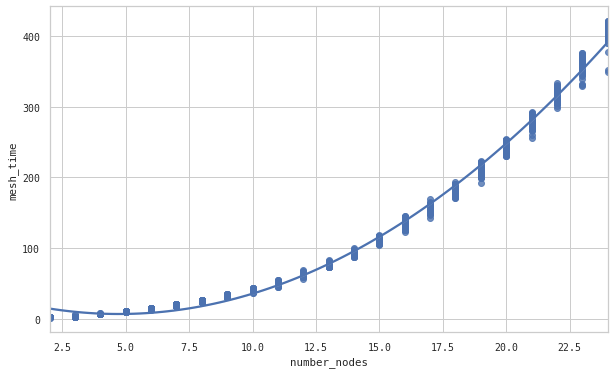

In [10]:
# polynomial regression of order 2
fig, axs = plt.subplots(1, 1, figsize=(10,6))
sns.regplot(x='number_nodes',
            y='mesh_time',
            data=times,
            order=2,
            ax=axs)